In [1]:
%load_ext autoreload
%autoreload 2

import skimage
import skimage.io
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.io as sio
sys.path.append("../src")
from imtools import *
from tsp import *

## Step 1: Create The Stipple

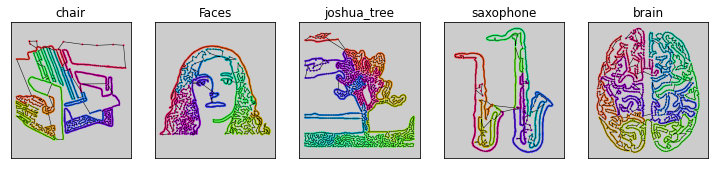

In [3]:
# ("pizza", "image_0003"), ("elephant", "image_0063") ("flamingo", "image_0001")
examples = [("chair", "image_0059"), ("Faces", "image_0326"), 
            ("joshua_tree", "image_0061"), ("saxophone", "image_0011"),
            ("brain", "image_0041")]
K = len(examples)
res = 2.5
plt.figure(figsize=(res*len(examples), res))
for i in range(len(examples)):
    plt.subplot(1, K, i+1)
    X = sio.loadmat("../data/caltech-101/{}/{}.mat".format(*examples[i]))["X"]
    Y = np.zeros((X.shape[0]+1, 2))
    Y[0:X.shape[0], :] = X
    Y[-1, :] = X[0, :]
    if examples[i][0] == "elephant":
        Y[:, 0] *= -1
    plt.scatter(Y[:, 0], Y[:, 1], s=1, c=sinebow(np.linspace(0, 1, Y.shape[0])), cmap='RdBu', zorder=1)
    plt.plot(Y[:, 0], Y[:, 1], 'k', linewidth=0.5)
    plt.gca().set_facecolor((0.8, 0.8, 0.8))
    plt.axis("equal")
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.title("{}".format(examples[i][0]))
plt.savefig("caltech101_samples.svg", bbox_inches='tight')